In [2]:
import numpy as np
import pandas as pd
import glob

In [55]:
files = glob.glob('*.csv')
data = pd.DataFrame()
for f in files:
    d = pd.read_csv(f)
    month = f.split("-")[1]
    if int(month) > 202101:        
        d = d.rename(columns={"started_at":"starttime","ended_at":"stoptime","start_station_id": "start station id","start_station_name": "start station name","start_lat": "start station latitude","start_lng": "start station longitude","end_station_id": "end station id","end_station_name": "end station name","end_lat": "end station latitude","end_lng": "end station longitude"})
    if data.shape[0] > 0:
        data = data.append(d)
    else:
        data = d

In [56]:
data.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,ride_id,rideable_type,member_casual
0,122.0,2020-06-01 00:02:21.7500,2020-06-01 00:04:24.3250,3792,Columbus Dr at Exchange Pl,40.716870,-74.032810,3639,Harborside,40.719252,-74.034234,42489.0,Subscriber,1987.0,1.0,NaN,NaN,NaN
1,1282.0,2020-06-01 00:12:27.1090,2020-06-01 00:33:50.0540,3198,Heights Elevator,40.748716,-74.040443,3276,Marin Light Rail,40.714584,-74.042817,42183.0,Subscriber,1988.0,1.0,NaN,NaN,NaN
2,186.0,2020-06-01 01:19:59.2090,2020-06-01 01:23:05.8930,3275,Columbus Drive,40.718355,-74.038914,3681,Grand St,40.715178,-74.037683,42140.0,Subscriber,1987.0,1.0,NaN,NaN,NaN
3,131.0,2020-06-01 01:26:42.2050,2020-06-01 01:28:53.8040,3267,Morris Canal,40.712419,-74.038526,3681,Grand St,40.715178,-74.037683,42120.0,Subscriber,1987.0,1.0,NaN,NaN,NaN
4,266.0,2020-06-01 01:27:33.7090,2020-06-01 01:32:00.1890,3639,Harborside,40.719252,-74.034234,3186,Grove St PATH,40.719586,-74.043117,42437.0,Subscriber,1972.0,2.0,NaN,NaN,NaN


In [60]:
data['starttime'] = pd.to_datetime(data['starttime'])
data['stoptime'] = pd.to_datetime(data['stoptime'])
data["tripminute"] = (data['stoptime'] - data['starttime']).dt.total_seconds() // 60

In [82]:
data['start hour']=data['starttime'].dt.hour.astype('category')
data['start day']=data['starttime'].dt.day.astype('category') 
data['weekday']=data['starttime'].dt.weekday.astype('category')
data['weekend'] = [d >= 5 for d in data['weekday']] # 0=monday

# Check if the behaviour changed pre-, during, post- pandemic

In [84]:
data_2019 = data[data["starttime"] < pd.to_datetime("2020-01-01")]
data_2020 = data[(data["starttime"] > pd.to_datetime("2019-12-31")) & (data["starttime"] < pd.to_datetime("2021-01-01"))]
data_2021 = data[data["starttime"] > pd.to_datetime("2020-12-31")]

In [64]:
data_2019.shape

(170468, 19)

In [65]:
data_2020.shape

(137967, 19)

In [66]:
data_2021.shape

(173873, 19)

Text(0.5, 1.0, '2021')

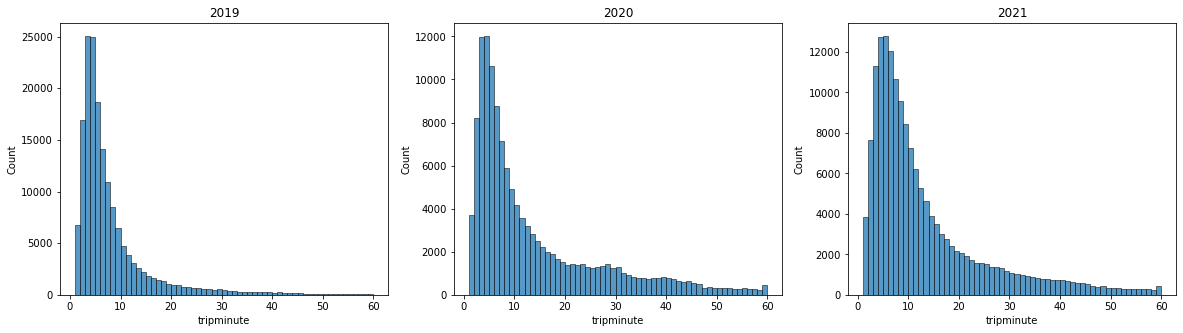

In [71]:
import seaborn as sns
import matplotlib.pyplot as plt
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 5), sharex=True)
sns.histplot(data=data_2019,x="tripminute", bins=range(1,61), ax=ax1)
ax1.set_title("2019")
sns.histplot(data=data_2020,x="tripminute", bins=range(1,61), ax=ax2)
ax2.set_title("2020")
sns.histplot(data=data_2021,x="tripminute", bins=range(1,61), ax=ax3)
ax3.set_title("2021")


Text(0.5, 1.0, '2021')

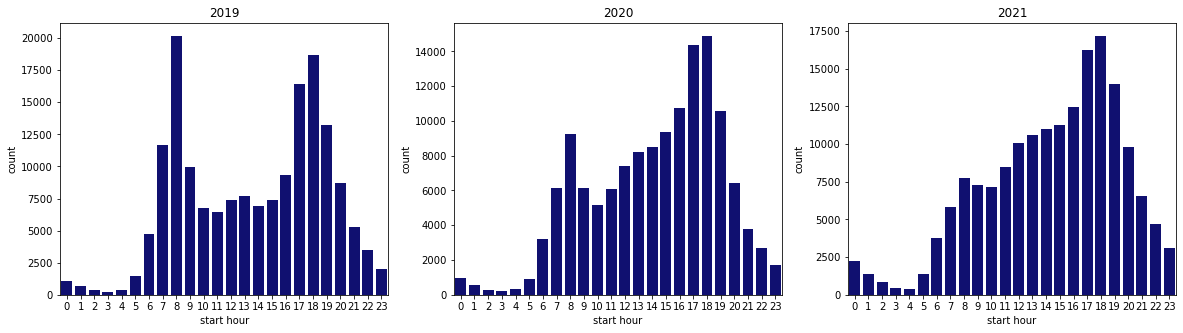

In [87]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 5), sharex=True)
sns.countplot(data=data_2019, x="start hour", color="navy", ax=ax1)
ax1.set_title("2019")
sns.countplot(data=data_2020, x="start hour", color="navy", ax=ax2)
ax2.set_title("2020")
sns.countplot(data=data_2021, x="start hour", color="navy", ax=ax3)
ax3.set_title("2021")

Text(0.5, 1.0, '2021')

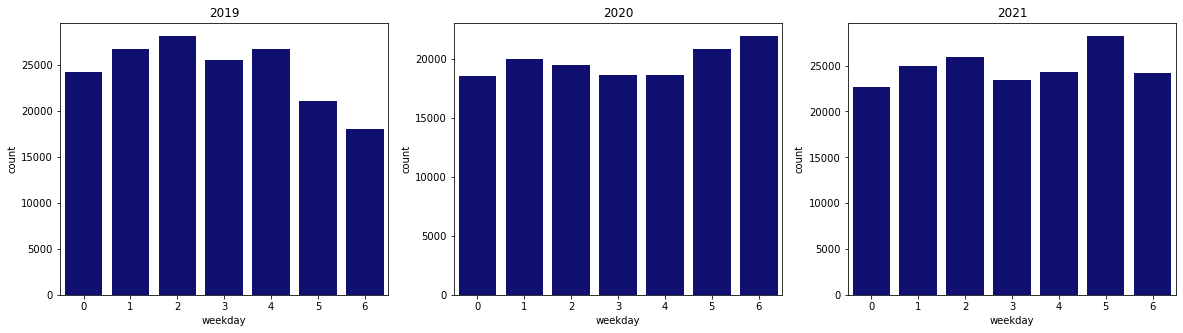

In [91]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 5), sharex=True)
sns.countplot(data=data_2019, x="weekday", color="navy", ax=ax1)
ax1.set_title("2019")
sns.countplot(data=data_2020, x="weekday", color="navy", ax=ax2)
ax2.set_title("2020")
sns.countplot(data=data_2021, x="weekday", color="navy", ax=ax3)
ax3.set_title("2021")

Text(0.5, 1.0, '2021')

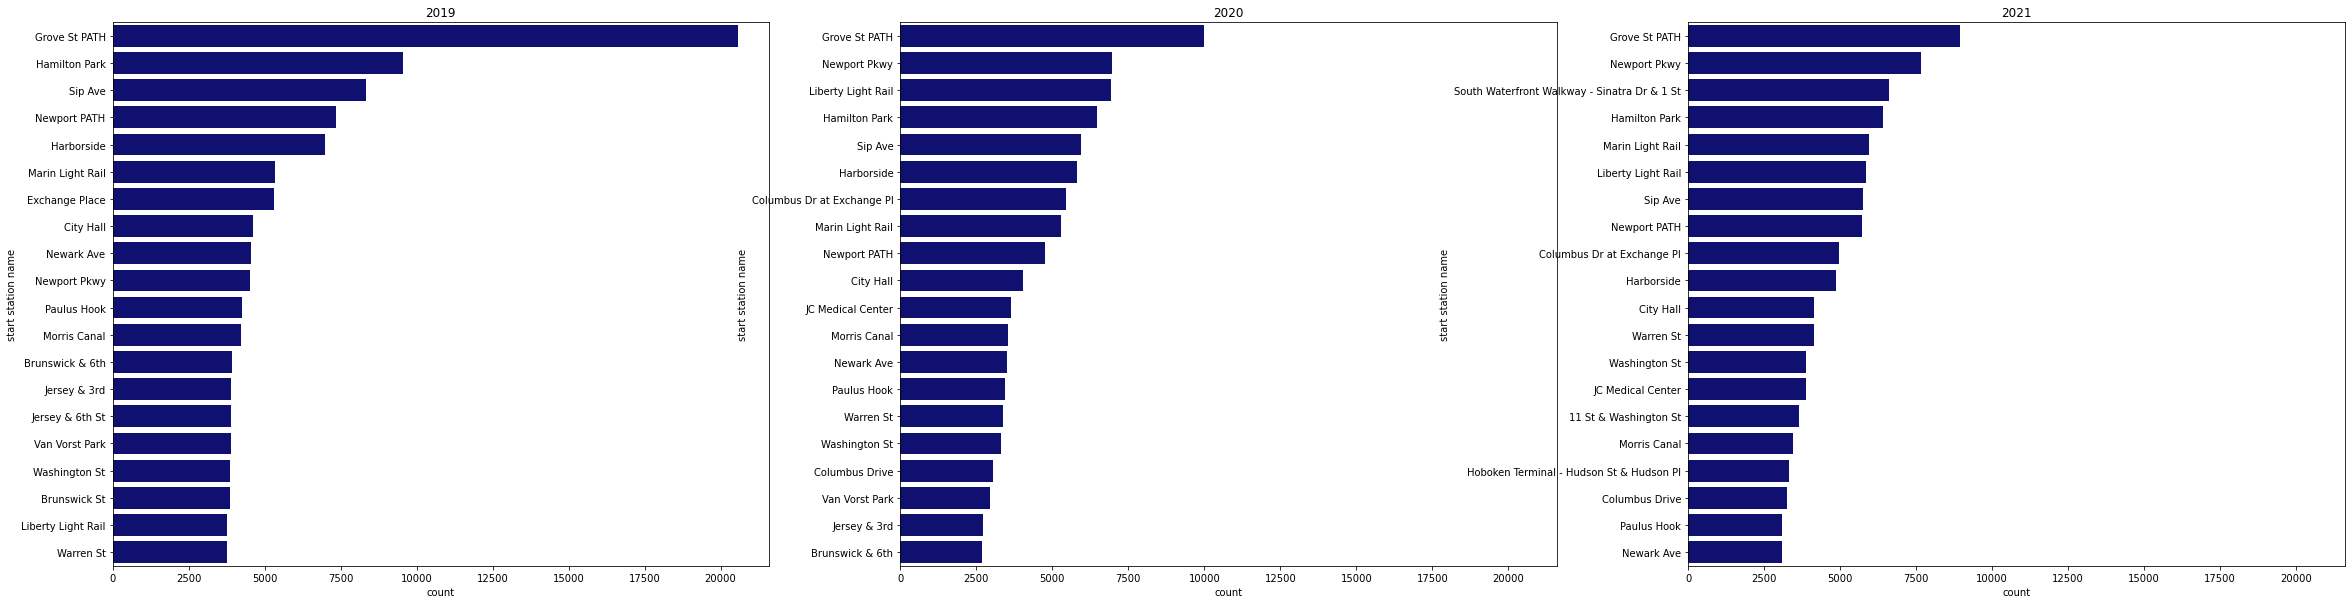

In [99]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(40, 10), sharex=True)
sns.countplot(data=data_2019, y="start station name", order=data_2019["start station name"].value_counts()[:20].index, color="navy", ax=ax1)
ax1.set_title("2019")
sns.countplot(data=data_2020, y="start station name", order=data_2020["start station name"].value_counts()[:20].index, color="navy", ax=ax2)
ax2.set_title("2020")
sns.countplot(data=data_2021, y="start station name", order=data_2021["start station name"].value_counts()[:20].index, color="navy", ax=ax3)
ax3.set_title("2021")

Text(0.5, 1.0, '2021')

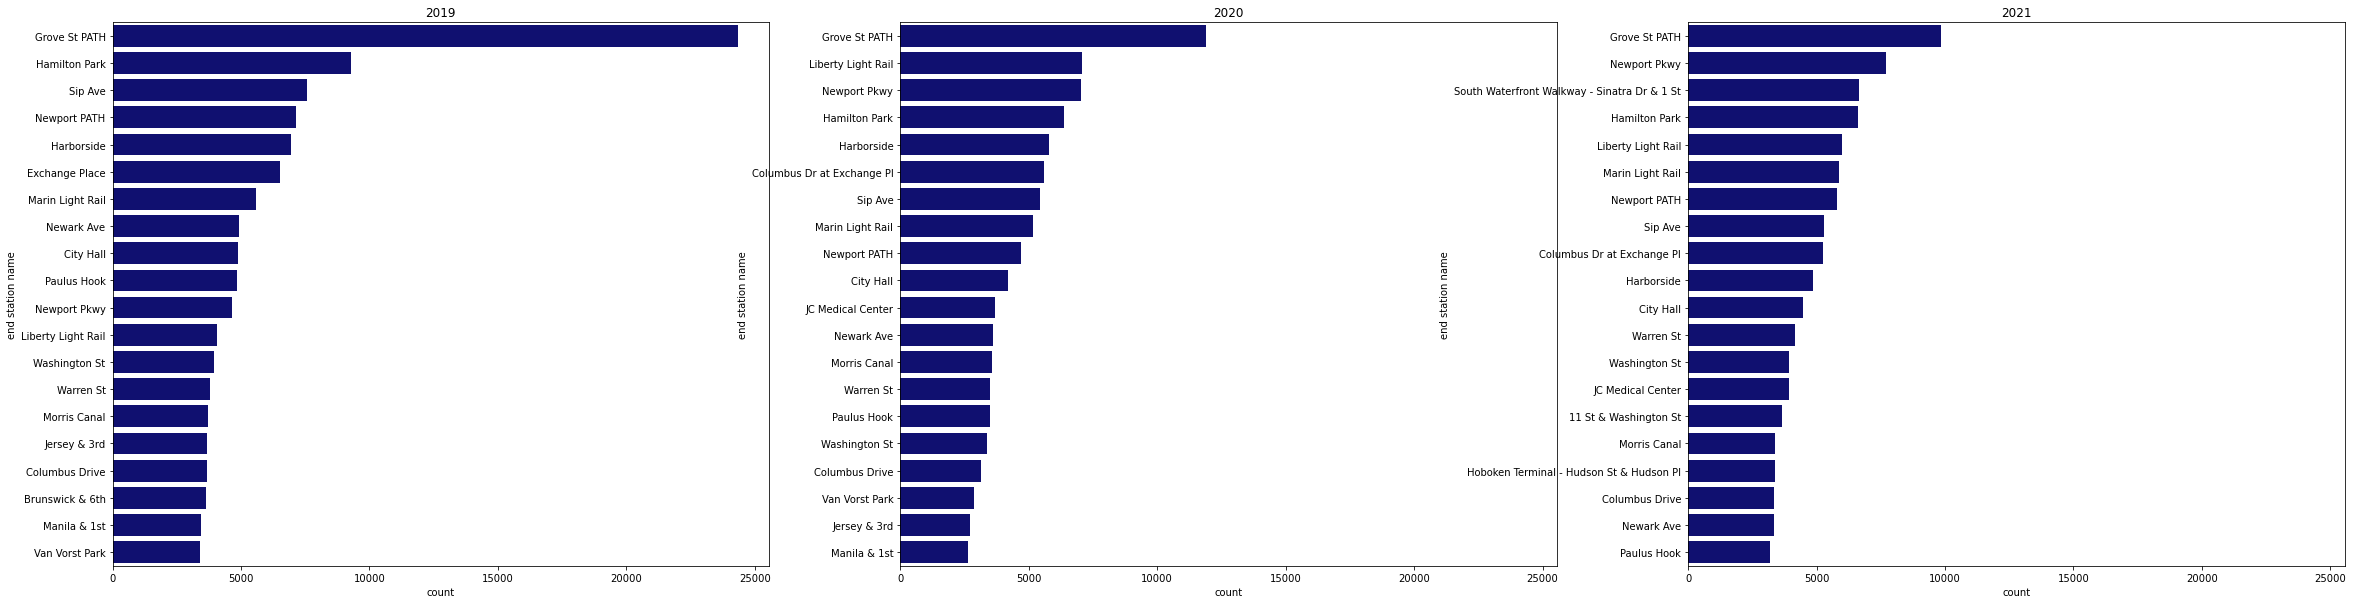

In [100]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(40, 10), sharex=True)
sns.countplot(data=data_2019, y="end station name", order=data_2019["end station name"].value_counts()[:20].index, color="navy", ax=ax1)
ax1.set_title("2019")
sns.countplot(data=data_2020, y="end station name", order=data_2020["end station name"].value_counts()[:20].index, color="navy", ax=ax2)
ax2.set_title("2020")
sns.countplot(data=data_2021, y="end station name", order=data_2021["end station name"].value_counts()[:20].index, color="navy", ax=ax3)
ax3.set_title("2021")

### citibike 24h heat map
use "end_station"

In [ ]:
## I think we should get the heapmap of the numbers of stations in district first, and then make heatmap of trips in district. and then do predictions.

In [117]:
import geopandas as gpd

In [118]:
stations = data[["start station name", "start station latitude", "start station longitude"]].drop_duplicates(subset=["start station name"])
stations

,start station name,start station latitude,start station longitude
0,Columbus Dr at Exchange Pl,40.716870,-74.032810
1,Heights Elevator,40.748716,-74.040443
2,Columbus Drive,40.718355,-74.038914
3,Morris Canal,40.712419,-74.038526
4,Harborside,40.719252,-74.034234
...,...,...,...
0,Exchange Place,40.716247,-74.033459
16024,JCBS Depot,40.709651,-74.068601
114,14 St Ferry - 14 St & Shipyard Ln,40.752961,-74.024353
193,Hoboken Terminal - Hudson St & Hudson Pl,40.735937,-74.030304


In [119]:
stations_geo = gpd.GeoDataFrame(
    stations, geometry=gpd.points_from_xy(stations["start station longitude"], stations["start station latitude"]))

In [125]:
import contextily as ctx

ModuleNotFoundError: No module named 'contextily'

In [124]:
stations_geo = stations_geo.to_crs(epsg=3857)
ax = stations_geo.plot(figsize=(10, 10), alpha=0.5, color='blue')
ctx.add_basemap(ax, url=ctx.providers.Stamen.TonerLite)
ax.set_axis_off()

ValueError: Cannot transform naive geometries.  Please set a crs on the object first.

In [112]:
for hour in range(24):
    hour_data = data_2019[data_2019["start hour"]==hour]
    hour_data = hour_data.groupby(by=["start station name"]).count().reset_index()
    
    